# Wordcloud
<br>  

### References
- [jqassistant](https://jqassistant.org)
- [py2neo](https://py2neo.org/2021.1/)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plot
from neo4j import GraphDatabase
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Please set the environment variable "NEO4J_INITIAL_PASSWORD" in your shell 
# before starting jupyter notebook to provide the password for the user "neo4j". 
# It is not recommended to hardcode the password into jupyter notebook for security reasons.

driver = GraphDatabase.driver(uri="bolt://localhost:7687", auth=("neo4j", os.environ.get("NEO4J_INITIAL_PASSWORD")))
driver.verify_connectivity()

In [3]:
def get_cypher_query_from_file(filename):
    with open(filename) as file:
        return ' '.join(file.readlines())

In [4]:
def query_cypher_to_data_frame(filename):
    records, summary, keys = driver.execute_query(get_cypher_query_from_file(filename))
    return pd.DataFrame([r.values() for r in records], columns=keys)

In [5]:
#The following cell uses the build-in %html "magic" to override the CSS style for tables to a much smaller size.
#This is especially needed for PDF export of tables with multiple columns.

In [6]:
%%html
<style>
/* CSS style for smaller dataframe tables. */
.dataframe th {
    font-size: 8px;
}
.dataframe td {
    font-size: 8px;
}
</style>

In [7]:
# Main Colormap
main_color_map = 'nipy_spectral'

## Word Cloud

In [8]:
# Query data from graph database
words = query_cypher_to_data_frame("../cypher/Overview/Words_for_Wordcloud.cypher")
words.head(20)

,word
0,org
1,axonframework
2,modelling
3,command
4,inspection
5,legacyjpa
6,saga
7,metamodel
8,repository
9,inmemory


There are 4779 words in the dataset.


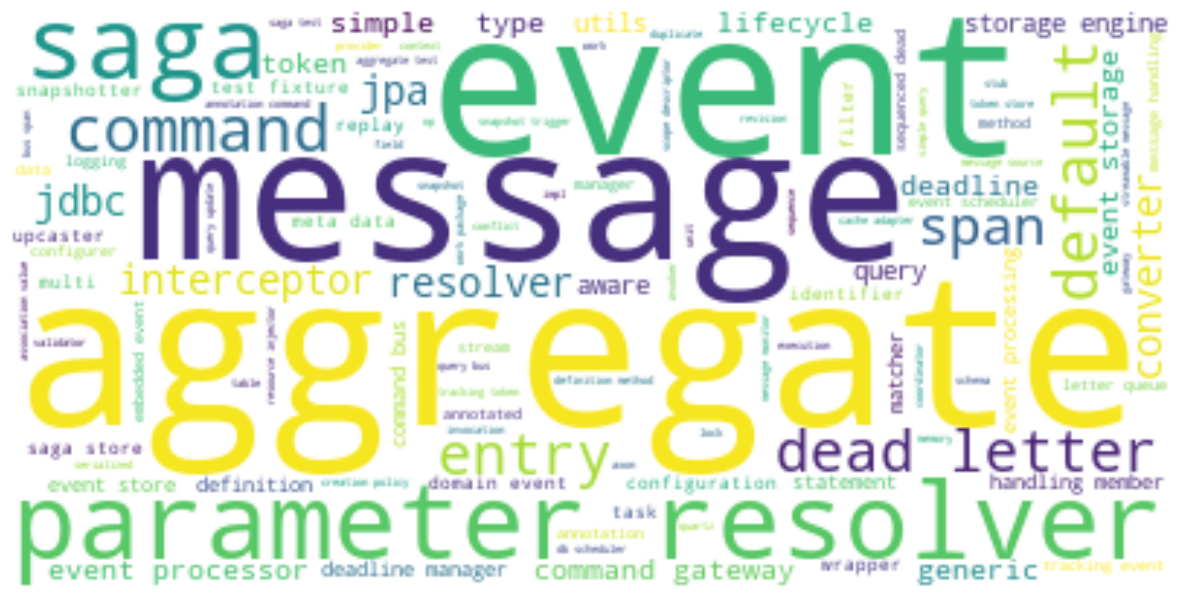

In [9]:
# Join all words into one text separated by spaces
text = " ".join(i for i in words.word)
print("There are {} words in the dataset.".format(len(words.word)))

# Define stop words
stopwords = set(STOPWORDS)
stopwords.update(['builder', 'exception', 'abstract', 'helper', 'util', 'callback', 'factory', 'handler', 'repository', 'result'])
wordcloud = WordCloud(stopwords=stopwords, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plot.figure(figsize=(15,10))
plot.imshow(wordcloud, interpolation='bilinear')
plot.axis("off")
plot.show()